# Dueeling Deep Q-Network (DDQN)
### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!apt-get -qq -y install swig
!apt-get -qq -y install python-box2d
!pip install pygame
!pip install gym[box2d]

Selecting previously unselected package swig4.0.
(Reading database ... 123105 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.1-5build1_amd64.deb ...
Unpacking swig4.0 (4.0.1-5build1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.1-5build1_all.deb ...
Unpacking swig (4.0.1-5build1) ...
Setting up swig4.0 (4.0.1-5build1) ...
Setting up swig (4.0.1-5build1) ...
Processing triggers for man-db (2.9.1-1) ...
Selecting previously unselected package python2-minimal.
(Reading database ... 123856 files and directories currently installed.)
Preparing to unpack .../python2-minimal_2.7.17-2ubuntu4_amd64.deb ...
Unpacking python2-minimal (2.7.17-2ubuntu4) ...
Selecting previously unselected package libpython2-stdlib:amd64.
Preparing to unpack .../libpython2-stdlib_2.7.17-2ubuntu4_amd64.deb ...
Unpacking libpython2-stdlib:amd64 (2.7.17-2ubuntu4) ...
Setting up python2-minimal (2.7.17-2ubuntu4) ...
Selecting previously unselected pa

### 2. Instantiate the Environment and Agent

In [3]:
env = gym.make('LunarLander-v2')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (8,)
Number of actions:  4


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [4]:
print(env.observation_space, env.action_space)
print(env.observation_space.sample())

Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32) Discrete(4)
[ 1.4131864   0.8235652   1.3504934   4.889596    0.77667767 -1.1997392
  0.02421699  0.37707913]


In [ ]:
print(env.observation_space, env.action_space)
env.observation_space.sample()

### 3. Train the Agent with DDQN

Episode 100	Average Score: -102.27
Episode 200	Average Score: -19.40
Episode 300	Average Score: 73.26
Episode 400	Average Score: 188.87
Episode 500	Average Score: 213.58
Episode 550	Average Score: 240.11
Environment solved in 450 episodes!	Average Score: 240.11


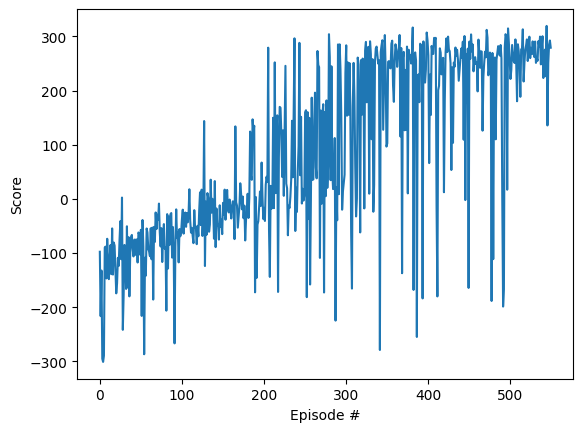

In [15]:
from dqn_agent import Agent
#model2+agent
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Dueling Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            #env.render()
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=240.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            #torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 3. Train the Agent with DDQN + learnable Value Estimators

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode 100	Average Score: -110.48
Episode 200	Average Score: -60.88
Episode 300	Average Score: 0.27
Episode 400	Average Score: 182.61
Episode 466	Average Score: 245.41
Environment solved in 366 episodes!	Average Score: 245.41


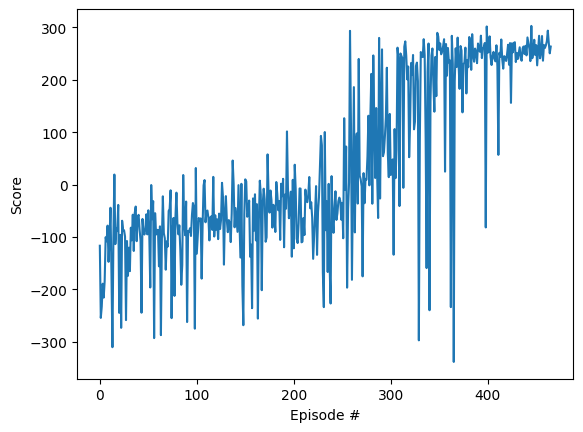

In [9]:
from dqn_agent_2 import Agent
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Dueling Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            #env.render()
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=240.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            #torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Watch smart Agent

In [ ]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

for i in range(5):
    state = env.reset()
    for j in range(300):
        action = agent.act(state)
        env.render()
        time.sleep(0.0125)
        state, reward, done, _ = env.step(action)
        if done:
            break 
            
env.close()